# Procesamiento de Imagenes con python üì∏ üêç
------------------
-------------------


El procesamiento de im√°genes es un m√©todo para realizar operaciones sobre im√°genes, con el fin de mejorarlas o extraer informaci√≥n √∫til, analizarla y tomar decisiones.

Cuantificando la informaci√≥n de las im√°genes, podemos hacer c√°lculos. El procesamiento de im√°genes es un subconjunto de la visi√≥n por computadora.

Existe una amplia gama de aplicaciones. Como el an√°lisis de im√°genes m√©dicas, inteligencia artificial, restauraci√≥n de im√°genes, vigilancia y muchos m√°s.

El prop√≥sito del procesamiento de im√°genes se puede dividir en m√∫ltiples grupos.
- Visualizaci√≥n: observar objetos que no son visibles.
- Restauraci√≥n de im√°genes: para crear una mejor imagen, cuando se dispone de informaci√≥n afectada por ruido o movimiento.
- Recuperaci√≥n de im√°genes: buscar una imagen de inter√©s en alg√∫n medio de almacenamiento (ej.: base de datos) y recuperarla de manera precisa.
- Reconocimiento de patr√≥n: para identificar patrones en los datos.
- Reconocimiento de Im√°genes: para distinguir objetos en una imagen.

Una imagen digital es una matriz de p√≠xeles cuadrados (elementos de imagen) dispuestos en columnas y filas: en otras palabras, una matriz bidimensional.

Los p√≠xeles contienen informaci√≥n sobre el color y la intensidad que posee cada secci√≥n de la imagen.

Hay algunas im√°genes con fines de prueba proporcionadas por scikit-image, en un m√≥dulo llamado datos. Si queremos cargar una imagen en color de un cohete, podemos hacerlo importando "datos" desde skimage. Luego, a partir de los datos, llama a un m√©todo llamado cohete.

array([[[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  7,  18,  36]],

       [[ 17,  33,  58],
        [ 17,  33,  58],
        [ 17,  33,  59],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       [[ 18,  34,  59],
        [ 18,  34,  59],
        [ 18,  34,  60],
        ...,
        [  8,  19,  37],
        [  8,  19,  37],
        [  8,  19,  37]],

       ...,

       [[ 27,  28,  32],
        [ 29,  29,  37],
        [ 20,  24,  36],
        ...,
        [136, 106,  82],
        [186, 136,  85],
        [173, 119,  81]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 30,  34,  46],
        ...,
        [103,  67,  45],
        [ 97,  61,  27],
        [ 76,  49,  20]],

       [[ 26,  27,  31],
        [ 29,  32,  39],
        [ 40,  46,  60],
        ...,
        [ 82,  53,  37],
        [ 79,  50,  32],
        [ 83,  61,  37]]], dtype=uint8)
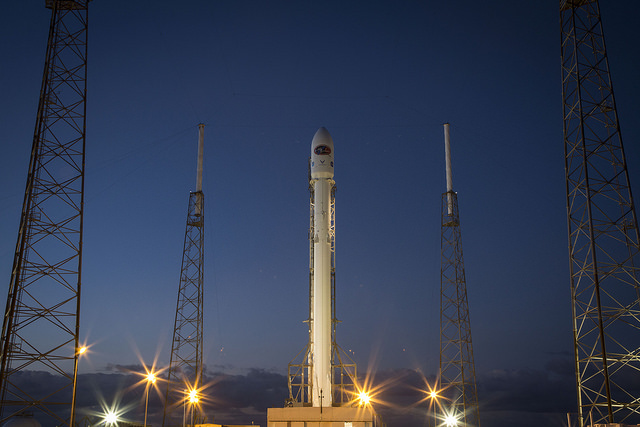

In [39]:
# Import the modules from skimage
from skimage import data, color
import matplotlib.pyplot as plt

# Load the rocket image
rocket = data.rocket()

rocket

Las im√°genes bidimensionales en color a menudo se representan en RGB: 3 capas de matrices bidimensionales, donde las tres capas representan los canales rojo, verde y azul de la imagen.

Las im√°genes en escala de grises s√≥lo tienen tonos de blanco y negro. A menudo, la intensidad de la escala de grises se almacena como un n√∫mero entero de 8 bits que da 256 posibles tonos de gris diferentes. 0 suele representar al color negro, 256 al color blanco y el resto de los numeros forman parte de la escala de grises intermedia. Las im√°genes en escala de grises no tienen ninguna informaci√≥n de color (como las RGB).

Las im√°genes RGB tienen tres canales de color, mientras que las en escala de grises tienen un solo canal. Podemos convertir una imagen con canales RGB a escala de grises usando la funci√≥n rgb2gray() proporcionada en el m√≥dulo "color" de skimage. Tambi√©n podemos realizar el procedimiento inverso: convertir la escala de grises a RGB usando gray2rgb().

En este cuaderno, normalmente usaremos una funci√≥n llamada show_image, para mostrar las im√°genes usando Matplotlib.

Declarar la funci√≥n aqu√≠, al comienzo del cuaderno, nos permite centrarnos en el c√≥digo de procesamiento de im√°genes.

In [40]:
# declaramos la funci√≥n
def show_image(image, title='Image', cmap_type='gray'):
    plt.imshow(image, cmap=cmap_type)
    plt.axis('off')
    plt.show()

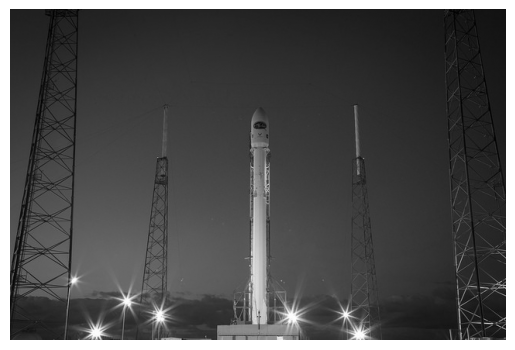

In [41]:
# mostrar la imagen en blanco y negro, una vez convertida
grayscale = color.rgb2gray(rocket)
show_image(grayscale, "Grayscale")

Images como NdArrays - Operaciones B√°sicas
---------------------
--------------
Este c√≥digo descarga una imagen desde una URL utilizando requests, la carga en memoria con PIL.Image, y la convierte en un array de NumPy para su posterior procesamiento. Primero, obtiene la imagen como un flujo de bytes con BytesIO, luego Image.open() la abre y np.array(image) la transforma en una matriz num√©rica. Finalmente, imprime las dimensiones de la imagen en forma de tupla (altura, anchura, canales), donde los canales representan el n√∫mero de colores (por ejemplo, 3 para RGB o 4 para RGBA).

Debido a que las im√°genes se pueden representar mediante matrices multidimensionales de NumPy (o "NdArrays"), los m√©todos de NumPy para manipular matrices funcionan bien en estas im√°genes.

In [3]:
from PIL import Image
import requests
import numpy as np
from io import BytesIO

# URL de la imagen
url = "https://d.newsweek.com/en/full/2272085/balltze-dog-aka-cheems.jpg"

# Descargar la imagen y cargarla con PIL
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# Convertir a un array de NumPy
image_np = np.array(image)

print("Tipo de dato de la imagen: ", type(image_np))


Tipo de dato de la imagen:  <class 'numpy.ndarray'>


La imagen sobre la que estamos trabajando es el un perro que se ha vuelto bastante famoso en redes sociales

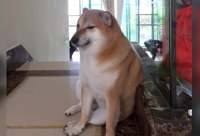

In [16]:
from IPython.display import display

# Redimensionar la imagen (mantiene proporciones)
image.thumbnail((300, 300))  # Ajusta el tama√±o deseado (ancho, alto)

# Mostrar imagen en Google Colab
display(image)

Otra operaci√≥n r√°pida que podemos hacer es mostrar la cantidad de pixeles que tiene la imagen y la forma en la que estos pixeles se distribuyen en el tensor que ella representa.

En este caso son 25473600 pixeles.
- 2400 pixeles de ancho
- 3538 pixeles de largo
- 3 canales (RGB)

Total de pixeles = 2400 x 3538 x 3 = 25473600

In [19]:
# Mostrar dimensiones de la imagen
print("Dimensiones de la imagen: ",image_np.shape)
print("Total pixeles: ",image_np.size)

Dimensiones de la imagen:  (2400, 3538, 3)
Total pixeles:  25473600


Si queremos voltear la imagen verticalmente podemos usar el m√©todo flipud(). Por su parte, el m√©todo fliplr() nos permite girarla horizontalmente

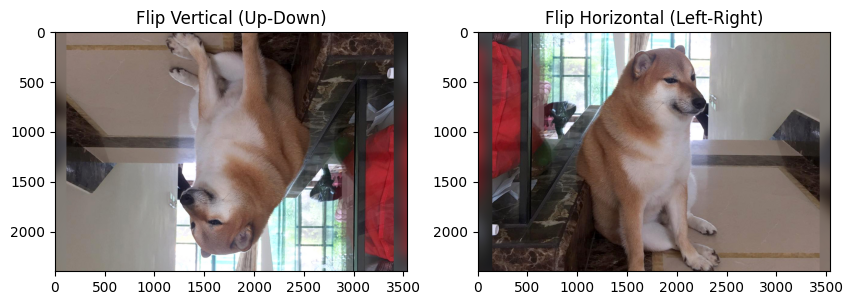

In [28]:
# Aplicar transformaciones
dog_ud = np.flipud(image)  # Voltear verticalmente
dog_lr = np.fliplr(image)  # Voltear horizontalmente

# Mostrar las im√°genes lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Crear una figura con 2 subgr√°ficos en una fila

axes[0].imshow(dog_ud)
axes[0].set_title("Flip Vertical (Up-Down)")
axes[0].axis("on")

axes[1].imshow(dog_lr)
axes[1].set_title("Flip Horizontal (Left-Right)")
axes[1].axis("on")

plt.show()

Imagenes e Histogramas
-------------
-------------
Matplotlib tiene un m√©todo para generar histogramas. Este m√©todo recibe un array de entrada (que representa la frecuencia) y un conjunto de intervalos (bins) como par√°metros. Los elementos consecutivos en el array de intervalos act√∫an como los l√≠mites de cada barra del histograma.

Para obtener el canal de la imagen, realizamos un slicing. Luego, utilizamos la funci√≥n de histograma aplicando ravel, que convierte los valores de color en un array unidimensional continuo. Pasamos este array a la funci√≥n junto con los intervalos. Establecemos bins en 256, ya que queremos contar la cantidad de p√≠xeles para cada posible valor de intensidad, desde 0 hasta 255, lo que requiere 256 valores en total.

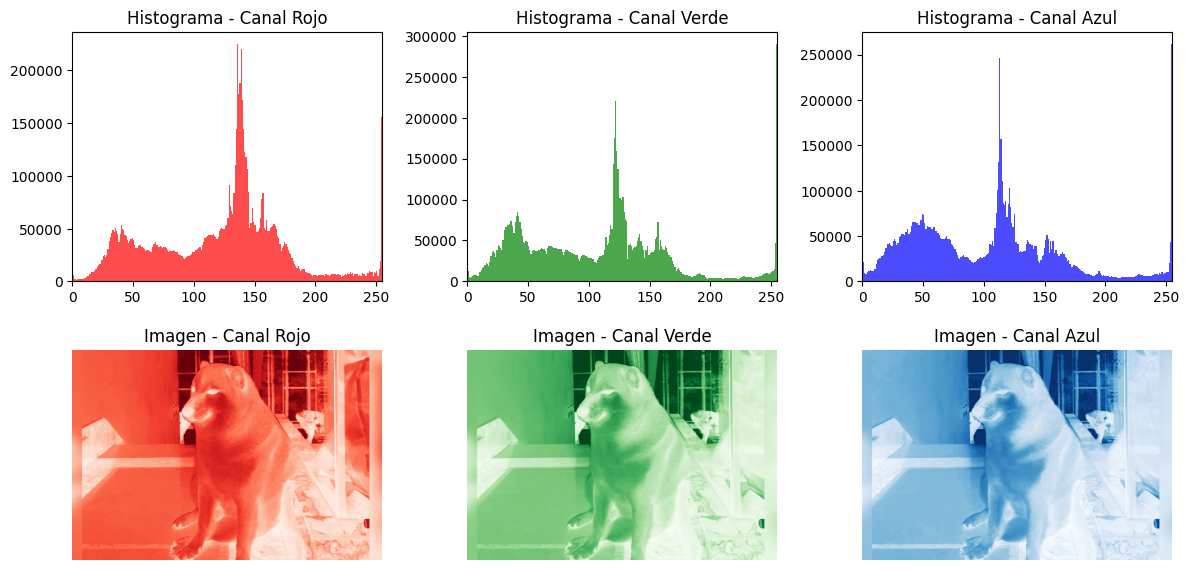

In [37]:
red_channel = image_np[:, :, 0]
green_channel = image_np[:, :, 1]
blue_channel = image_np[:, :, 2]

# Crear la figura con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(12, 6))

# Histogramas en la primera fila
axes[0, 0].hist(red_channel.ravel(), bins=256, color='red', alpha=0.7)
axes[0, 0].set_title("Histograma - Canal Rojo")
axes[0, 0].set_xlim([0, 255])

axes[0, 1].hist(green_channel.ravel(), bins=256, color='green', alpha=0.7)
axes[0, 1].set_title("Histograma - Canal Verde")
axes[0, 1].set_xlim([0, 255])

axes[0, 2].hist(blue_channel.ravel(), bins=256, color='blue', alpha=0.7)
axes[0, 2].set_title("Histograma - Canal Azul")
axes[0, 2].set_xlim([0, 255])

# Im√°genes en la segunda fila
axes[1, 0].imshow(red_channel, cmap="Reds")
axes[1, 0].set_title("Imagen - Canal Rojo")
axes[1, 0].axis("off")

axes[1, 1].imshow(green_channel, cmap="Greens")
axes[1, 1].set_title("Imagen - Canal Verde")
axes[1, 1].axis("off")

axes[1, 2].imshow(blue_channel, cmap="Blues")
axes[1, 2].set_title("Imagen - Canal Azul")
axes[1, 2].axis("off")

plt.tight_layout()  # Ajustar el espacio entre los gr√°ficos
plt.show()

M√©todo del valor umbral
-----------------------
-----------------------

El m√©todo del valor umbral es el modo m√°s simple de segmentaci√≥n de im√°genes. Los umbrales nos permiten aislar elementos y se utilizan en la detecci√≥n de objetos, el reconocimiento facial y otras aplicaciones.

El m√©todo del valor umbral funciona mejor en im√°genes en escala de grises de alto contraste. Por eso, para establecer un umbral en las im√°genes en color, primero debemos convertirlas a escala de grises.

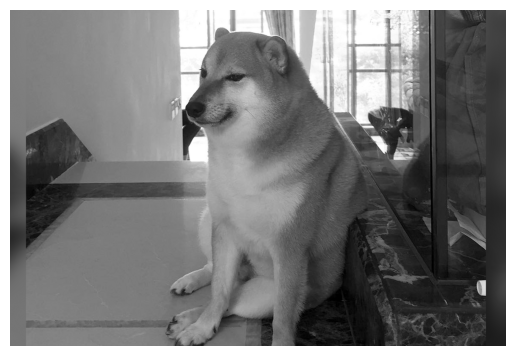

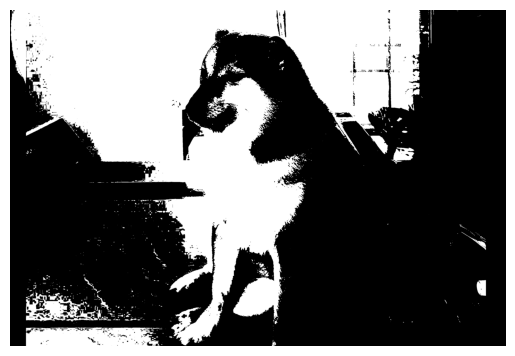

In [7]:
from skimage import color

gray_scaled_dog = color.rgb2gray(image_np)

# Obtener el umbral (en el rango [0, 1] para im√°genes en escala de grises)
thresh = 0.5  # Este valor est√° en el rango [0, 1]

# Aplicar umbralizaci√≥n
binary = gray_scaled_dog > thresh  # Esto crea una imagen binaria de True/False

# Convertir la imagen binaria a 0 y 255 para su visualizaci√≥n
binary_image = binary.astype(np.uint8) * 255  # Convertir True a 255 y False a 0

# Mostrar las im√°genes
show_image(gray_scaled_dog, 'Original en Escala de Grises')
show_image(binary_image, 'Imagen Umbralizada')

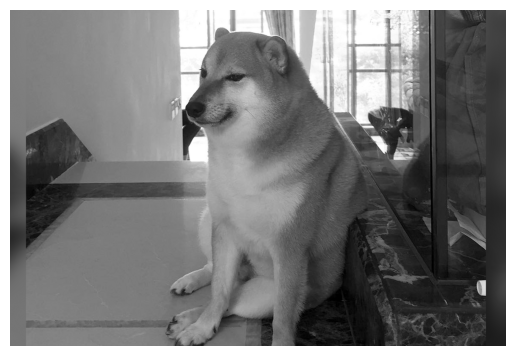

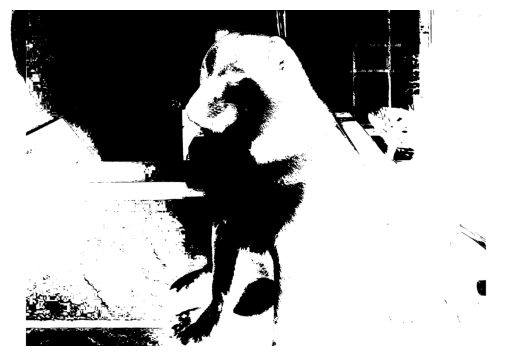

In [53]:
# Aplicar umbralizaci√≥n
binary2 = gray_scaled_dog < thresh  # Esto crea una imagen binaria de True/False

# Convertir la imagen binaria a 0 y 255 para su visualizaci√≥n
binary_image2 = binary2.astype(np.uint8) * 255  # Convertir True a 255 y False a 0

# Mostrar las im√°genes
show_image(gray_scaled_dog, 'Original en Escala de Grises')
show_image(binary_image2, 'Imagen Umbralizada')

Existen dos categor√≠as de umbralizaci√≥n en scikit-image:
- **Global o basada en histograma**: es eficiente cuando la iluminaci√≥n y el contraste en toda la imagen son relativamente homog√©neos. Sin embargo, en situaciones con diferencias significativas de luz, como im√°genes tomadas en exteriores o con sombras, la umbralizaci√≥n global puede no ser efectiva. Un ejemplo cl√°sico son las im√°genes tomadas en condiciones de luz cambiante, como al amanecer o atardecer, donde las sombras pueden alterar el contraste de la imagen.

- **Umbralizaci√≥n adaptativa o local**: es m√°s √∫til para im√°genes con iluminaci√≥n no uniforme. Por ejemplo, en im√°genes m√©dicas, como radiograf√≠as, la iluminaci√≥n del fondo puede variar dependiendo de la m√°quina o el √°ngulo de la toma. La umbralizaci√≥n local es excelente para resaltar caracter√≠sticas espec√≠ficas en estas condiciones. Sin embargo, su mayor complejidad computacional puede ser un desaf√≠o cuando se trabaja con grandes vol√∫menes de im√°genes o im√°genes de alta resoluci√≥n.

Ahora bien, si se desea explorar m√°s algoritmos, scikit-image incluye una funci√≥n llamada try_all_threshold del m√≥dulo filters, que eval√∫a varios algoritmos globales de umbralizaci√≥n y permite elegir el que mejores resultados proporcione. Para utilizar esta funci√≥n, basta con importar la funci√≥n y pasarle la imagen. Luego, se pueden visualizar los resultados.

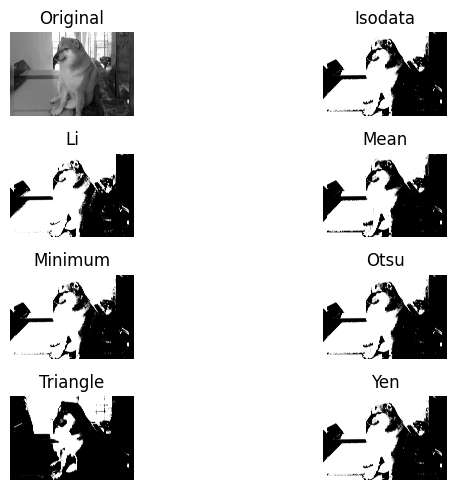

In [63]:
from skimage.filters import try_all_threshold

# Obtain all the resulting images
fig, ax = try_all_threshold(gray_scaled_dog, verbose=False)
plt.show()

Las imagenes anteriores nos muestran la aplicaci√≥n de diferentes m√©todos de umbral sobre la misma imagen. A modo de ejemplo, tratemos de concentrarnos en el m√©todo Otsu y veamos un poco m√°s c√≥mo funciona

La l√≠nea roja en el histograma representa el valor del umbral calculado mediante el m√©todo de Otsu, que se utiliza para separar los p√≠xeles de la imagen en dos grupos: aquellos con valores por debajo del umbral (en negro) y aquellos con valores por encima del umbral (en blanco).

**Lo que nos dice esta l√≠nea roja:**

- Separaci√≥n de los p√≠xeles: La l√≠nea roja marca el valor de intensidad en el que el algoritmo de Otsu ha decidido que la imagen debe ser dividida. Los p√≠xeles con valores de intensidad menores a este umbral se asignan a una clase (usualmente la clase "negra" o fondo), y los p√≠xeles con valores mayores a este umbral se asignan a la otra clase (usualmente la clase "blanca" o primer plano).

- Maximizaci√≥n de la varianza inter-clase: El valor del umbral que se muestra con la l√≠nea roja es el que maximiza la varianza entre las dos clases (fondo y primer plano), lo que permite una separaci√≥n √≥ptima entre las √°reas claras y oscuras de la imagen. Este es el objetivo principal del m√©todo de Otsu: encontrar el punto de corte que mejor separa los dos grupos.

- Contexto visual: Al observar el histograma, la l√≠nea roja indica el punto en el que la imagen cambia de tener valores m√°s oscuros a valores m√°s claros. En im√°genes que tienen una distribuci√≥n bimodal de intensidades (es decir, dos picos en el histograma, como los objetos en el fondo oscuro y el primer plano claro), Otsu encuentra este umbral de manera mucho m√°s r√°pida y precisa.

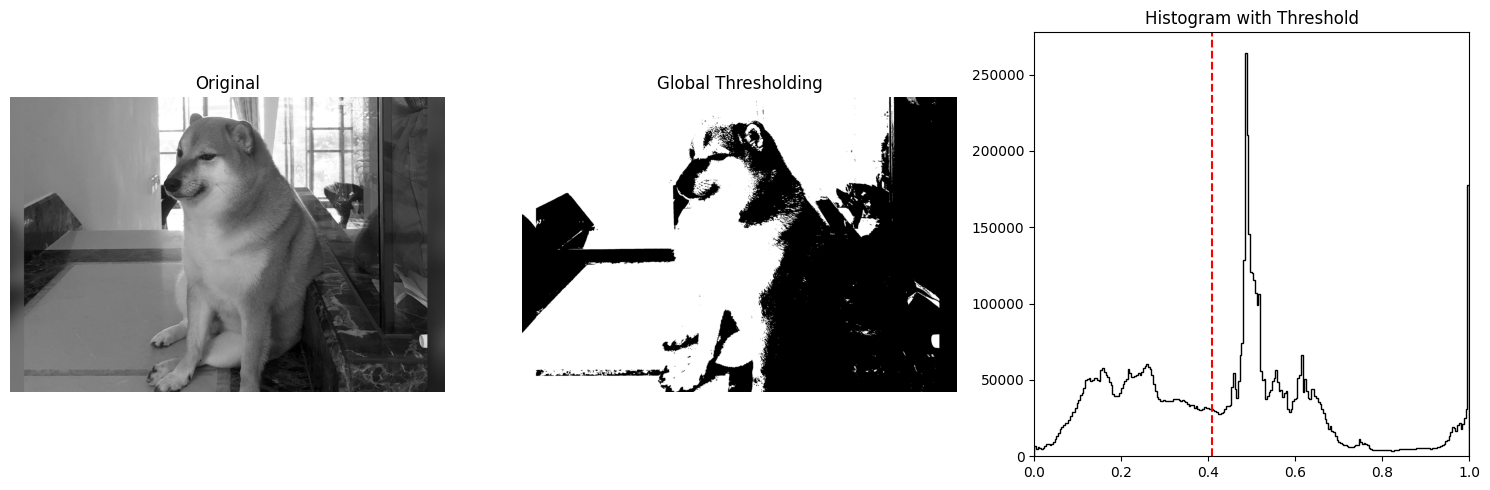

In [66]:
# Import the otsu threshold function
from skimage.filters import threshold_otsu

# Obtener el valor de umbral √≥ptimo utilizando Otsu
thresh = threshold_otsu(gray_scaled_dog)

# Aplicar umbralizaci√≥n a la imagen
binary_global = gray_scaled_dog > thresh

# Crear una figura con 3 subgr√°ficos: dos para las im√°genes y uno para el histograma
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar la imagen original
axes[0].imshow(gray_scaled_dog, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')  # Ocultar los ejes

# Mostrar la imagen umbralizada
axes[1].imshow(binary_global, cmap='gray')
axes[1].set_title('Global Thresholding')
axes[1].axis('off')  # Ocultar los ejes

# Crear el histograma
axes[2].hist(gray_scaled_dog.ravel(), bins=256, histtype='step', color='black')
axes[2].axvline(thresh, color='red', linestyle='--')  # L√≠nea del umbral en rojo
axes[2].set_title('Histogram with Threshold')
axes[2].set_xlim(0, 1)  # Ajustar el rango del histograma de 0 a 1

# Mostrar la figura
plt.tight_layout()
plt.show()

A los fines de hacer algunas comparaciones, vamos a probar ahora con el valor de umbral adaptativo o local.

Como punto de partida, nuestro codigo va a tomar la imagen en blanco y negro. Luego, mediante la funci√≥n threshold_local(), aplicamos el umbral adaptativo, definiendo algunos par√°metros:

- Tama√±o impar de la vecindad de p√≠xeles que se utiliza para calcular el valor umbral (por ejemplo, 3, 5, 7,‚Ä¶, 21,‚Ä¶). Este va a ser el kernel que vamos a ir moviendo al rededor de cada pixel, para calcular su nuevo valor.

- Method: se utiliza para determinar el umbral adaptativo para el vecindario local. Ej: gausiana, media, mediana o una funci√≥n espec√≠ficamente definida.

- offset: constante restada de la media ponderada del vecindario, para calcular el valor umbral local. El desplazamiento predeterminado es 0.

- mode: determina c√≥mo se manejan los bordes de la matriz, donde cval es el valor cuando modo es igual a "constant". El valor predeterminado es "reflect".

- cval: si definimos el modo como "constant", este par√°metro nos permite introducir el valor de la constante usada para rellenar los bordes de la imagen, donde el kernel sobresale. Ej.: 0, 1, el promedio.

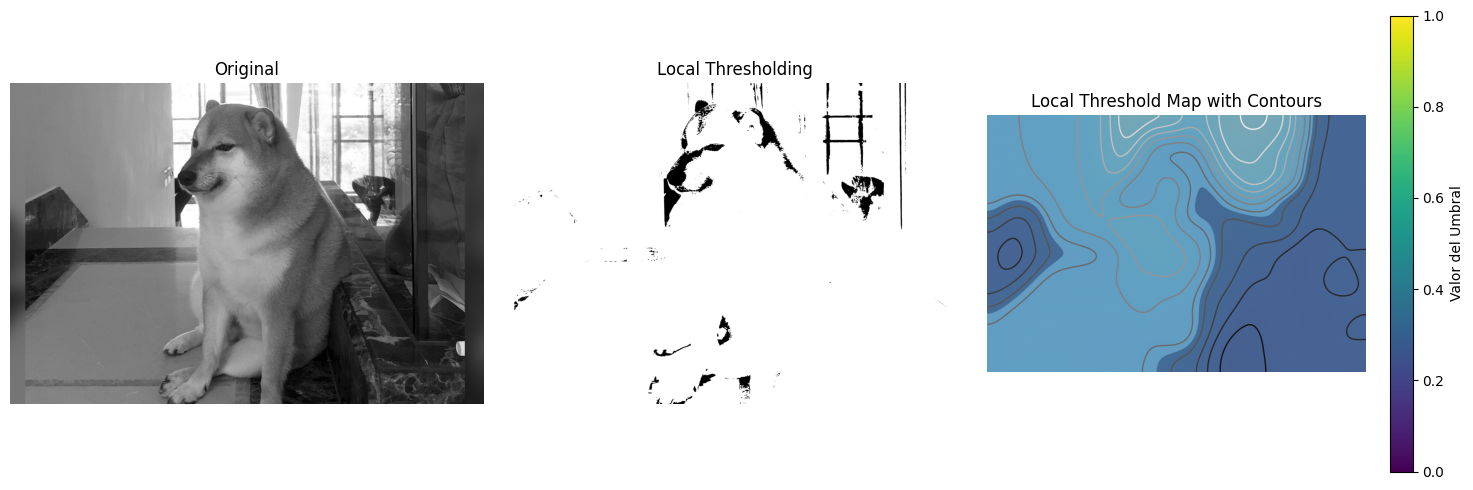

In [36]:
# Importar funciones
from skimage.filters import threshold_local
from skimage import color
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label
import requests
from io import BytesIO


# Colocar el tama√±o del bloque
block_size = 755
offset = 0.2

# Obtener el umbral local √≥ptimo con el m√©todo 'gaussian'
local_thresh = threshold_local(gray_scaled_dog, block_size, offset=offset, method='gaussian')

# Normalizar el mapa de umbrales para que est√© en el rango [0, 1]
local_thresh_normalized = (local_thresh - np.min(local_thresh)) / (np.max(local_thresh) - np.min(local_thresh))

# Obtener una imagen binaria aplicando el umbral
binary_local = gray_scaled_dog > local_thresh

# Etiquetar las regiones con umbrales similares
labeled_regions = label(local_thresh)

# Crear una figura con 3 subgr√°ficos: dos para las im√°genes y uno para el mapa de umbrales
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Mostrar la imagen original
axes[0].imshow(gray_scaled_dog, cmap='gray')
axes[0].set_title('Original')
axes[0].axis('off')  # Ocultar los ejes

# Mostrar la imagen binarizada con umbral local
axes[1].imshow(binary_local, cmap='gray')
axes[1].set_title('Local Thresholding')
axes[1].axis('off')  # Ocultar los ejes

# Mostrar el mapa de umbrales normalizado con el mapa de colores 'viridis'
cbar = axes[2].imshow(local_thresh_normalized, cmap='viridis')
fig.colorbar(cbar, ax=axes[2], orientation='vertical', label='Valor del Umbral')

# A√±adir contornos sobre el mapa de umbrales para resaltar las √°reas de cambio significativo
axes[2].contour(local_thresh, levels=10, cmap='gray', linewidths=1)

# Resaltar √°reas con umbrales altos y bajos (umbral alto: > 0.8, umbral bajo: < 0.2)
threshold_high = 0.8
threshold_low = 0.2

mask_high = local_thresh > threshold_high
mask_low = local_thresh < threshold_low

axes[2].imshow(mask_high, cmap='Blues', alpha=0.5)  # Resaltar umbrales altos
axes[2].imshow(mask_low, cmap='Reds', alpha=0.5)    # Resaltar umbrales bajos

# Mostrar el etiquetado de las regiones
axes[2].imshow(labeled_regions, cmap='tab20', alpha=0.6)

axes[2].set_title('Local Threshold Map with Contours')
axes[2].axis('off')  # Ocultar los ejes

# Mostrar la figura
plt.tight_layout()
plt.show()


Otro tipo de imagenes donde podemos aplicar este tipo de t√©cnicas es en el procesamiento de texto en im√°genes. Cuanto m√°s limpio se vea el texto, cuanto m√°s disminuya el ruido, mejor ser√°n nuestros resultados. Aqu√≠ puede verse como funciona la implementacion de varios filtros sobre una hoja escrita.

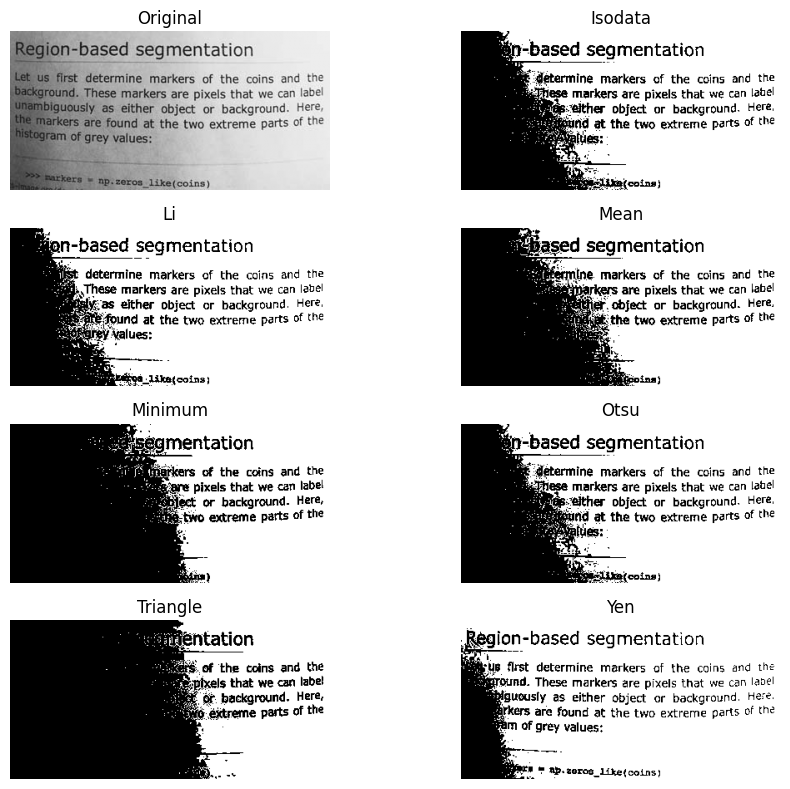

In [15]:
import skimage as ski

img = ski.data.page()

fig, ax = ski.filters.try_all_threshold(img, figsize=(10, 8), verbose=False)

plt.show()

Aqu√≠ puede verse con m√°s detalle la comparaci√≥n entre el umbral global y el umbral local, con un caso diferente. En el caso del procesamiento de imagenes con texto, parece funcionar mejor el umbral local.

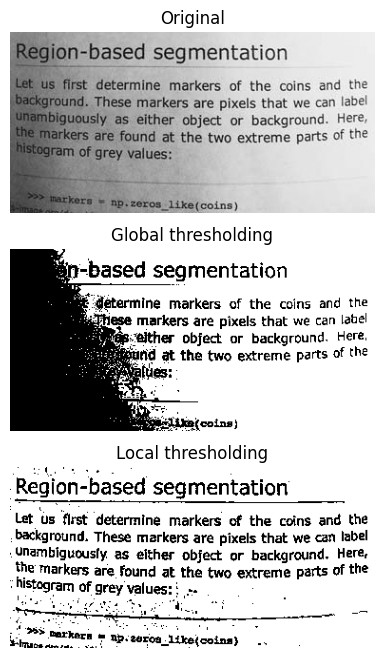

In [38]:
image = ski.data.page()

global_thresh = ski.filters.threshold_otsu(image)
binary_global = image > global_thresh

block_size = 35
local_thresh = ski.filters.threshold_local(image, block_size, offset=5, method='gaussian')
binary_local = image > local_thresh

fig, axes = plt.subplots(nrows=3, figsize=(7, 8))
ax = axes.ravel()
plt.gray()

ax[0].imshow(image)
ax[0].set_title('Original')

ax[1].imshow(binary_global)
ax[1].set_title('Global thresholding')

ax[2].imshow(binary_local)
ax[2].set_title('Local thresholding')

for a in ax:
    a.set_axis_off()

plt.show()